## **Overview**

A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.

A few tasks that can be performed using this dataset is as follows:

Perform Data-Cleaning, Preprocessing, Visualizing and Feature Engineering on the Dataset.

Implement Heirarchical Clustering, K-Means Clustering models.

Create RFM (Recency,Frequency,Monetary) Matrix to identify Loyal Customers.



I am going to use the dataset for implementing a K-means clustering model.


# **Step 1: Reading and Understanding the dataset**

In [67]:
# import required libraries for dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import required libraries for clustering
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Reading the data on which analysis needs to be done
df = pd.read_csv('/content/Credit Card Customer Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
# Shape of df
df.shape

(660, 7)

In [6]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
# df description
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


# **Step 2: Data Preparation**

In [8]:
# Check out whether there is any missing value in the dataset
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Text(0.5, 0, 'Attirbuites')

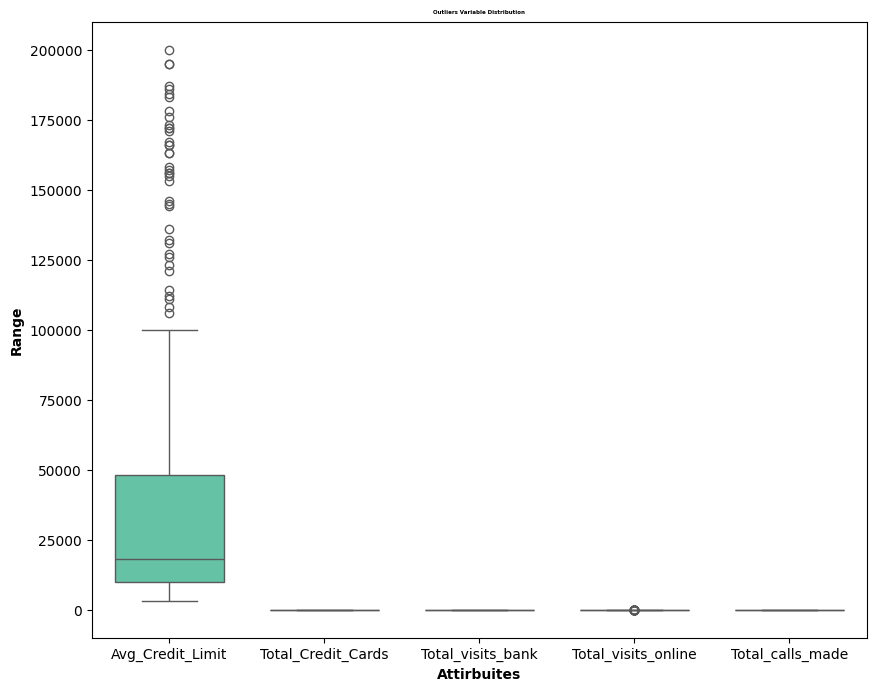

In [9]:
# Check out if there are outliers in features
attributes = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=df[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=4, fontweight='bold')
plt.ylabel("Range", fontweight="bold")
plt.xlabel("Attirbuites", fontweight='bold')

In [10]:
# Remove outlers for Avg_Credit_Limit
Q1 = df.Avg_Credit_Limit.quantile(0.05)
Q3 = df.Avg_Credit_Limit.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Avg_Credit_Limit >= Q1 - 1.5*IQR) & (df.Avg_Credit_Limit <= Q3 + 1.5*IQR)]

# Remove outlers for Total_visits_online
Q1 = df.Total_visits_online.quantile(0.05)
Q3 = df.Total_visits_online.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Total_visits_online >= Q1 - 1.5*IQR) & (df.Total_visits_online <= Q3 + 1.5*IQR)]

In [11]:
# Rescale the features because there are some differences among features' scales.
# As ther are not any negative values, we can use MinMaxScaler
X =df.iloc[:,2:].values # Selecting the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# **Step 3: Building the Model**

**Finding the Optimal Numer of Clusters**

**Elbow curve to get the right number of clusters:**
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow method is one of the most popular methods to determine this optimal value of k.

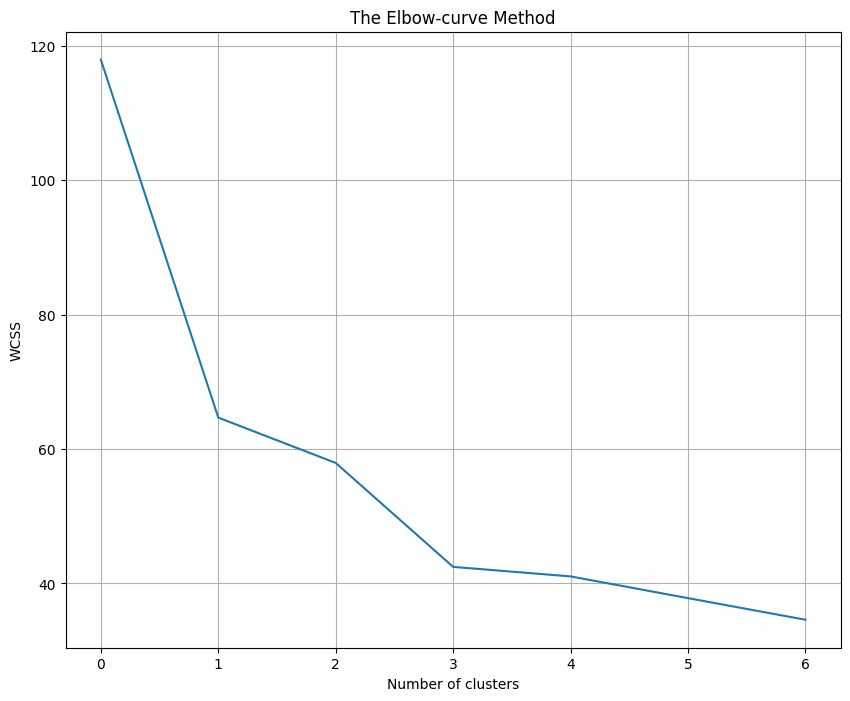

In [12]:
# Elbow-curve
wcss = [] # Within Cluster Sum of Squares
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', init='k-means++', random_state=42)
    kmeans.fit(X_scaled)

    wcss.append(kmeans.inertia_)

# Plot the WCSS for each n_clusters
plt.plot(wcss)
plt.title('The Elbow-curve Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

There is another approach to get the best K. The silhouette is a metric used to evaluate the quality of clusters in unsupervised learning, including clustering algorithms like K-means. It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouetter score ranges from -1 to 1, where a high silhouette score indicates that the object is well matched to its won cluster and poorly matched to neighboring clusters.

+1: The sample is far away from the neighboring clusters, indicating it is well-clustedrd.

0: The sample is on or very closed to the decision boundary between two neighboring clusters.

-1: The sample may be assigned to the wrong cluster.
The number of clusters that maximized the silhouette score is often considered the best choice.



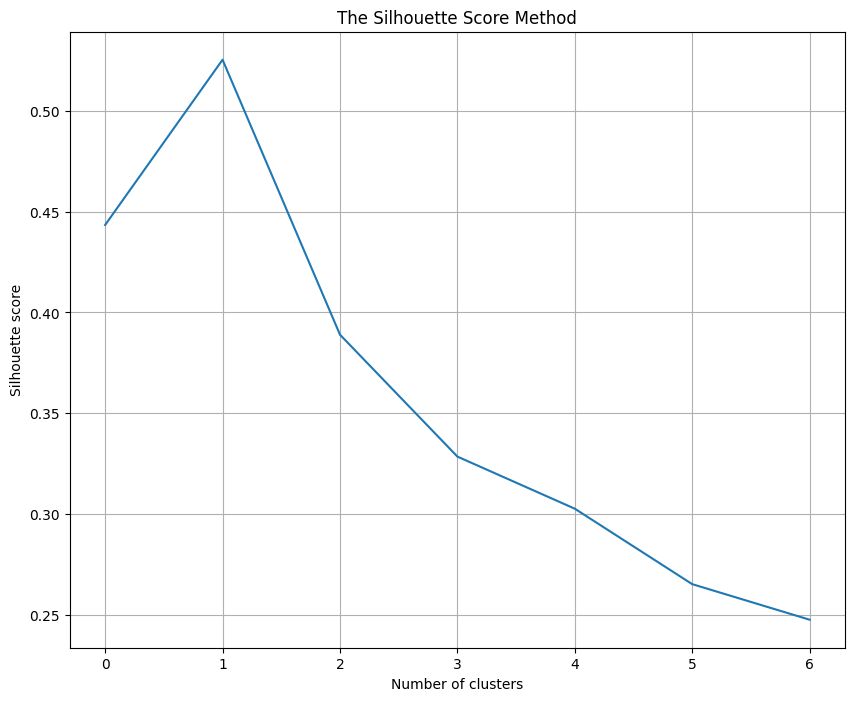

In [13]:
from sklearn.metrics import silhouette_score

kmeans_per_k = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', init='k-means++', random_state=42)
    kmeans.fit(X_scaled)

    kmeans_per_k.append(kmeans)

silhouette_scores=[]
for model in kmeans_per_k:
    score = silhouette_score(X_scaled, model.labels_)
    silhouette_scores.append(score)

# Plot the silhouetter score for each n_clusters
plt.plot(silhouette_scores)
plt.title('The Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

The optimal cluster: 3

In [14]:
# Kmeans Clustering
kmeans = KMeans(n_clusters=3, n_init='auto', init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [15]:
df_combined = pd.DataFrame(X_scaled, columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])
df_combined['clusters'] = clusters
df_combined.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
0,0.492386,0.111111,0.2,0.066667,0.0,1
1,0.238579,0.222222,0.0,0.666667,0.9,0
2,0.238579,0.666667,0.2,0.200000,0.4,1
3,0.137056,0.444444,0.2,0.066667,0.4,0
4,0.492386,0.555556,0.0,0.800000,0.3,2


# **Step 4: Final Analysis**

* Visualize the clusters in 3D

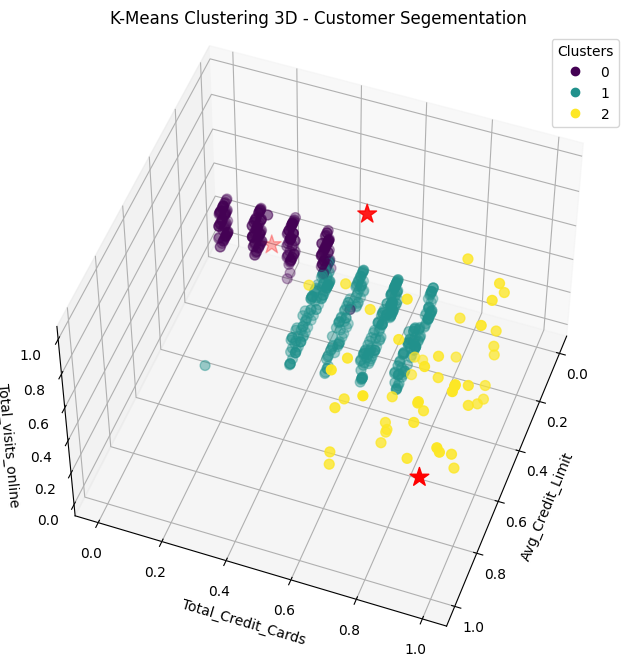

In [40]:
# Set up the visualization of the clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot of the data points colored by the predicted cluster labels
scatter = ax.scatter(df_combined['Avg_Credit_Limit'], df_combined['Total_Credit_Cards'], df_combined['Total_visits_online'],
c=clusters, cmap='viridis', s=50)

# centroids
centroid = kmeans.cluster_centers_
ax.scatter(centroid[:, 0], centroid[:, 1], centroid[:, 2], c='red', marker='*', s=200, label='Centroids')

# Labels and legend
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_online')
ax.set_title('K-Means Clustering 3D - Customer Segementation')
plt.legend(*scatter.legend_elements(), title='Clusters')

# Adjust the view angle for better visibility
ax.view_init(elev=50, azim=20)
plt.show()

- Use K-means without scaling. We are going to draw a boxplot for each feature to compare clusters.

In [41]:
# assign the label
df['Cluster_ID'] = clusters

<ipython-input-62-2c4763d1dc0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_ID', y='Avg_Credit_Limit', data=df, palette='deep')


<Axes: xlabel='Cluster_ID', ylabel='Avg_Credit_Limit'>

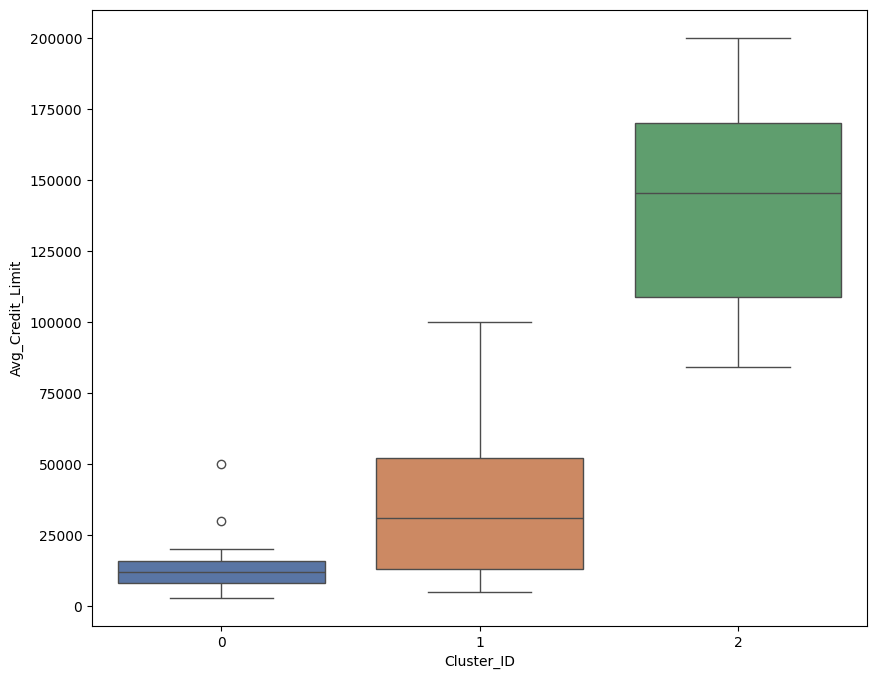

In [62]:
# Box plot to visualize Avg_Credit_Limit by cluster
sns.boxplot(x='Cluster_ID', y='Avg_Credit_Limit', data=df, palette='deep')

<ipython-input-63-7de4316f0d56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_ID', y='Total_Credit_Cards', data=df, palette='deep')


<Axes: xlabel='Cluster_ID', ylabel='Total_Credit_Cards'>

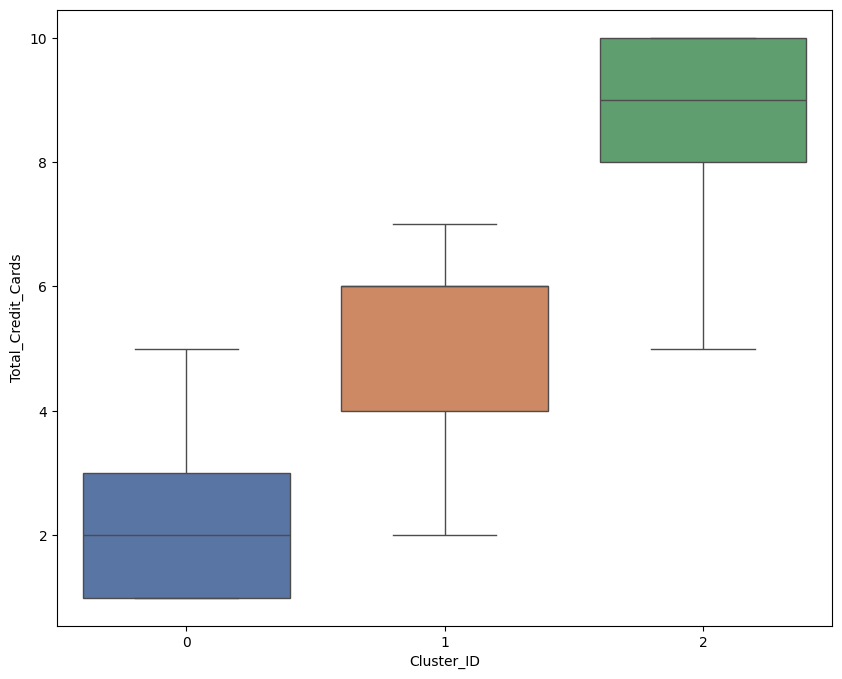

In [63]:
# Box plot to visualize Total_Credit_Cards by cluster
sns.boxplot(x='Cluster_ID', y='Total_Credit_Cards', data=df, palette='deep')

<ipython-input-64-d79f3003a0d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_ID', y='Total_visits_bank', data=df, palette='deep')


<Axes: xlabel='Cluster_ID', ylabel='Total_visits_bank'>

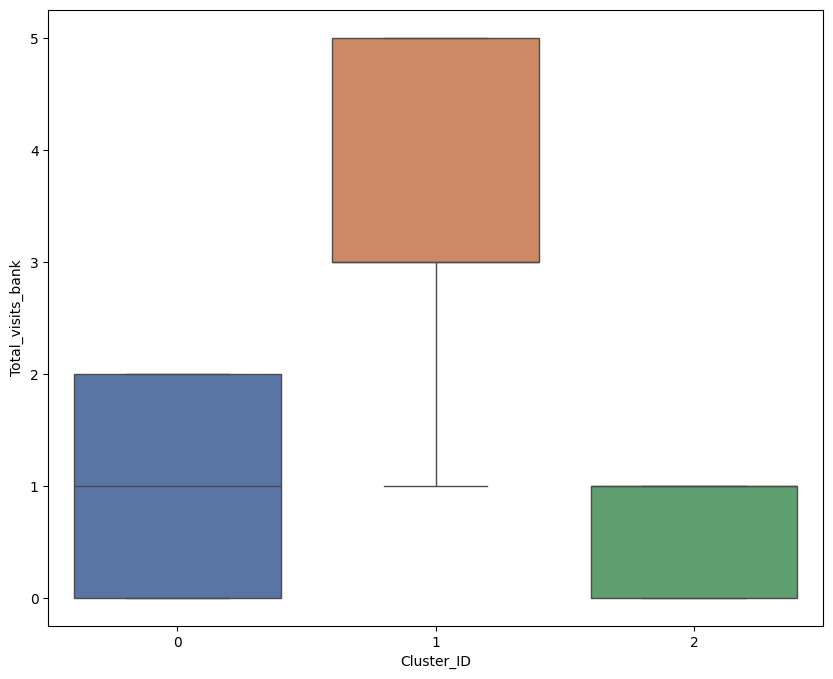

In [64]:
# Box plot to visualize Total_visits_bank by cluster
sns.boxplot(x='Cluster_ID', y='Total_visits_bank', data=df, palette='deep')

<ipython-input-65-04cb00f038bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_ID', y='Total_visits_online', data=df, palette='deep')


<Axes: xlabel='Cluster_ID', ylabel='Total_visits_online'>

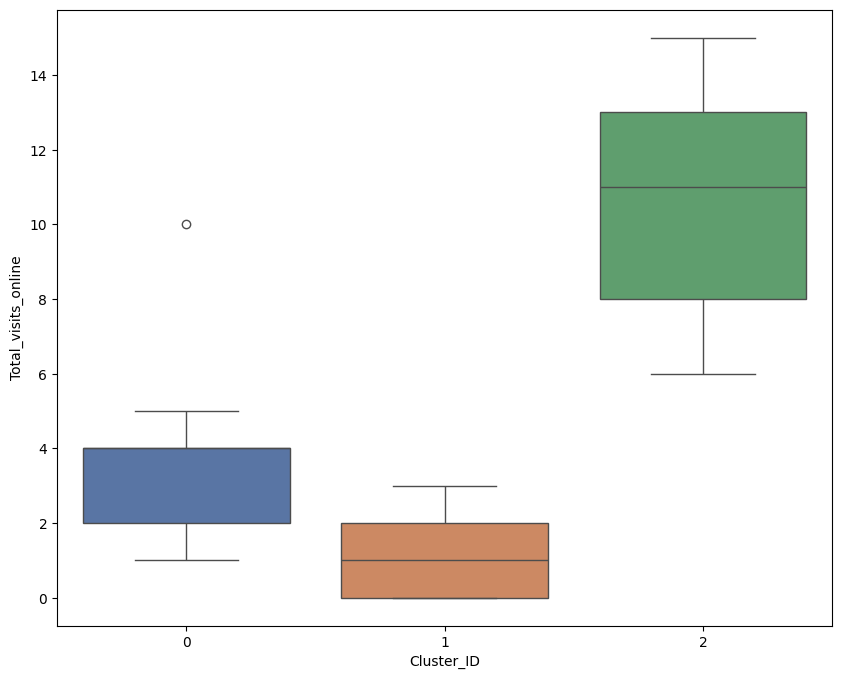

In [65]:
# Box plot to visualize Total_visits_online by cluster
sns.boxplot(x='Cluster_ID', y='Total_visits_online', data=df, palette='deep')

<ipython-input-66-a88135ab36ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_ID', y='Total_calls_made', data=df, palette='deep')


<Axes: xlabel='Cluster_ID', ylabel='Total_calls_made'>

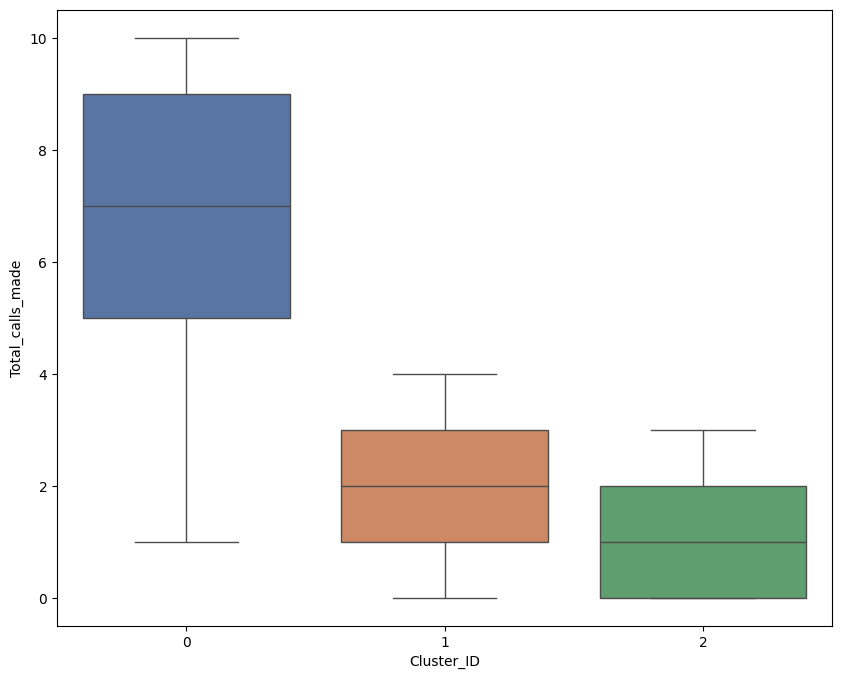

In [66]:
# Box plot to visualize Total_calls_made by cluster
sns.boxplot(x='Cluster_ID', y='Total_calls_made', data=df, palette='deep')

**Customer Segmentation**

- Cluster 0 does not make very active transactions with their credit cards on average. Compared to other clusters, they prefer to interact with phone counselors. It is possible to promote additional financial products to them by the phone-calls.

- Cluster 1 prefers to visit the bank in-person. However, it is also possible to induce these customers to the online banking for the purpose of cost-saving.

- Lastly, Cluster 2 prefers to use the online-banking relative to other types of contact. They are also the most profitable segment. The bank can offer online shopping cuopons to stimulate their consumption by credit cards.
